# DSC 80: Lab 08

### Due Date: Tuesday, March 2 Midnight (11:59pm)

## Instructions
Much like in DSC 10, this Jupyter Notebook contains the statements of the problems and provides code and markdown cells to display your answers to the problems. Unlike DSC 10, the notebook is *only* for displaying a readable version of your final answers. The coding work will be developed in an accompanying `lab*.py` file, that will be imported into the current notebook.

Labs and programming assignments will be graded in (at most) two ways:
1. The functions and classes in the accompanying python file will be tested (a la DSC 20),
2. The notebook will be graded (for graphs and free response questions).

**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name. The dictionary at the end of the file (`GRADED FUNCTIONS`) contains the "grading list". The final function in the file allows your doctests to check that all the necessary functions exist.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for working in the Notebook**:
- The notebooks serve to present you the questions and give you a place to present your results for later review.
- The notebook on *lab assignments* are not graded (only the `.py` file).
- Notebooks for PAs will serve as a final report for the assignment, and contain conclusions and answers to open ended questions that are graded.
- The notebook serves as a nice environment for 'pre-development' and experimentation before designing your function in your `.py` file.

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are encouraged to write your own additional functions to solve the lab! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `lab**.py` (much like we do in the notebook).
- Always document your code!

### Importing code from `lab**.py`

* We import our `.py` file that's contained in the same directory as this notebook.
* We use the `autoreload` notebook extension to make changes to our `lab**.py` file immediately available in our notebook. Without this extension, we would need to restart the notebook kernel to see any changes to `lab**.py` in the notebook.
    - `autoreload` is necessary because, upon import, `lab**.py` is compiled to bytecode (in the directory `__pycache__`). Subsequent imports of `lab**` merely import the existing compiled python.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lab08 as lab

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

# Scaling Transformations: log vs square root

**Question 1**

A scaling transformation transforms the scale of the data of a particular quantitative column. Mathematically, each data point $x_i$ is replaced with the transformed value $y_i = f(x_i)$, where $f$ is a transformation function. In general, it is not easy to select a good transformation for a given prediction problem. There are many transformations to choose from and each has a different mathematical intuition. 

Generally, the goal of a scaling transformation is to change the data from a complicated, non-linear relationship into a *linear* relationship. Linear relationships are very easy to understand and easily used by models (e.g. linear regression).

Non-linear growth is a commonly seen relationship in data. Sometimes this growth is *exponential* and sometimes it is by a *fixed power*. The scaling transformations that turn these types of growth linear are *log* and *root* transformations respectively.

In this problem you need to decide what transformation can be applied to a given dataset in order to make the relationship as *linear as possible*.


* To practice: create a dataframe consisting of the numbers $1$ to $99$ squared and plot the values. Then apply the square root transformation, add another column to the original dataframe and plot the columns side by side. What change do you observe?  

* Now repeat exactly the same steps but this time create a dataframe with an exponential distribution by raising the value `e` to the powers 1 to 99. Plot these values, perform a log transformation and plot the results, as above. What did you observe?

* Let's apply these ideas to the real dataset `homeruns`. You are given a MLB home run dataset with 120 yearly observations from 1900 to 2019. It includes a count of the number of [home runs](http://m.mlb.com/glossary/standard-stats/home-run) hit each year. You need to decide what transformation works better for this dataset: square root or a log transformation. 

*Note (A few helpful hints)*: 
* You may find `sns.regplot` and `scipy.stats.linregress` useful for judging the effectiveness of your transformations! 
* Recall that a well fit linear model has no patterns in it's residuals -- `sns.residplot` can help with this decision.
* If you need a refresher on correlation coefficients, see [DSC10](https://www.inferentialthinking.com/chapters/15/1/Correlation.html) as well as the Discussion 08 notebook.

Create a function `best_transformation` that returns an integer with the value corresponding to the following choices:

1. Square root transformation.
2. Log transformation
3. Both work the same.
4. Neither gives a transformation revealing a linear relationship. 


# ASK!!!! 
## Not sure what this question is doing????

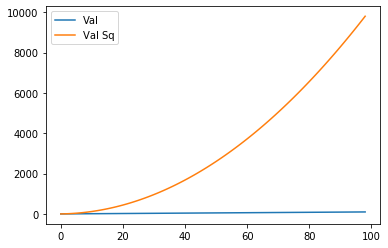

In [4]:
# Test - Square
data = {'Val':np.arange(1, 100), 'Val Sq':np.arange(1, 100) ** 2}
square = pd.DataFrame(data)
square.plot()

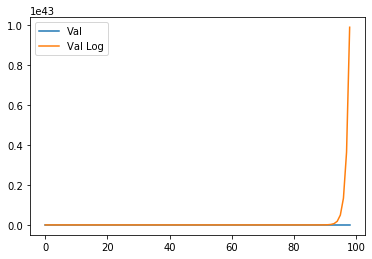

In [5]:
# Test - Log
data = {'Val':np.arange(1, 100), 'Val Log':np.exp(np.arange(1, 100))}
square = pd.DataFrame(data)
square.plot()

In [6]:
homeruns_fp = os.path.join('data', 'homeruns.csv')
homeruns = pd.read_csv(homeruns_fp)

In [7]:
homeruns.head()

,Year,Homeruns
0,1900,254
1,1901,455
2,1902,354
3,1903,335
4,1904,331


In [8]:
scipy.stats.linregress(homeruns)

LinregressResult(slope=46.85801791791097, intercept=-89327.73611014655, rvalue=0.9557604405463247, pvalue=1.4957133568538366e-64, stderr=1.3275689460582019)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


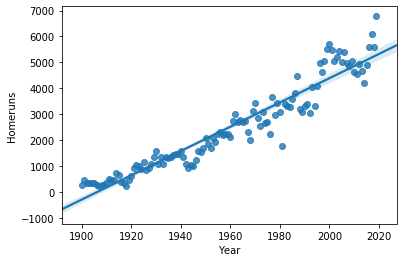

In [9]:
sns.regplot(data=homeruns, x='Year', y='Homeruns')

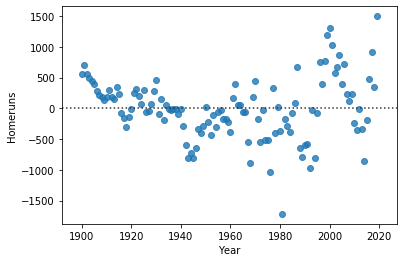

In [10]:
sns.residplot(data=homeruns, x='Year', y='Homeruns')

### Log Transformation

In [11]:
log = homeruns.copy()
log['Homeruns'] = log['Homeruns'].apply(np.log)

In [12]:
scipy.stats.linregress(log)

LinregressResult(slope=0.02461719558857972, intercept=-40.73942975083988, rvalue=0.9442735182825754, pvalue=8.787444983618044e-59, stderr=0.000789967556045467)

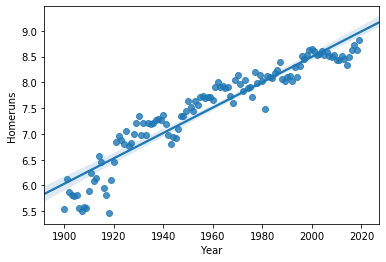

In [13]:
sns.regplot(data=log, x='Year', y='Homeruns')

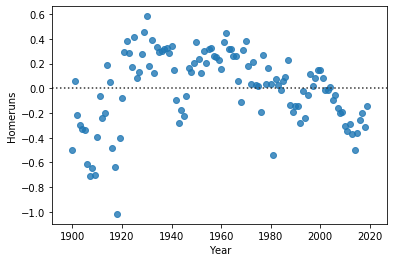

In [14]:
sns.residplot(data=log, x='Year', y='Homeruns')

### Square Root Transformation

In [15]:
sqrt = homeruns.copy()
sqrt['Homeruns'] = sqrt['Homeruns'].apply(np.sqrt)

In [16]:
scipy.stats.linregress(sqrt)

LinregressResult(slope=0.5066406225988712, intercept=-946.237670462341, rvalue=0.9719878986889177, pvalue=4.676843532127833e-76, stderr=0.011277766903363394)

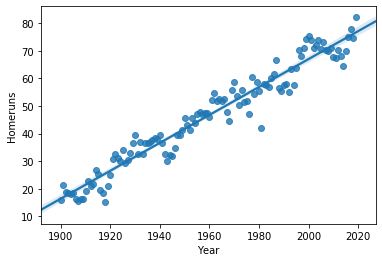

In [17]:
sns.regplot(data=sqrt, x='Year', y='Homeruns')

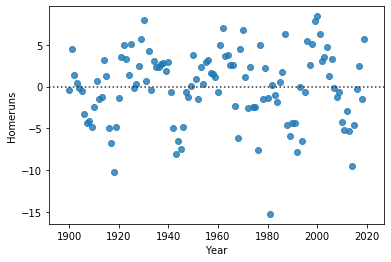

In [18]:
sns.residplot(data=sqrt, x='Year', y='Homeruns')

In [19]:
def best_transformation():
    """
    Returns an integer corresponding to the correct option.

    :Example:
    >>> best_transformation() in [1,2,3,4]
    True
    """

    # take log and square root of the dataset
    # look at the fit of the regression line (and R^2)

    return 1


# Diamond Pricing 

The next problems deal with predicting the price of a diamond based on standard measured properties of diamonds. You will use linear regression to predict the price, while improving the quality of your predictions using *feature engineering*.

Since this question is supposed to help you understand feature engineering, **you will be building these features from scratch**, instead of using the built in `sklearn` or `pandas` methods.

The diamond dataset is downloaded using `seaborn`, via `sns.load_dataset('diamonds')`. The dataset is a DataFrame with 53940 rows and 10 variables:

|column|description|
|---|---|
|price|price in US dollars (326 - 18,823 USD)|
|carat|weight of the diamond (0.2 - 5.01)|
|cut|quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color|diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x|length in mm (0 - 10.74)|
|y|width in mm (0 - 58.9)|
|z|depth in mm (0 - 31.8)|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)|
|table|width of top of diamond relative to widest point (43 - 95)|

In [21]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Ordinal Encoding

**Question 2**

Every categorical variable in the dataset is an ordinal column. Recall that *ordinal encoding* is a feature transformation that maps the values of an ordinal column to the natural numbers (preserving the order of the column values). Create a function `create_ordinal` that takes in `diamonds` and returns a dataframe of ordinal features with names `ordinal_<col>` where `<col>` is the original categorical column name.

*Note*: Remember, you are creating this function using basic pandas. You should create a helper function that takes in a single column and an ordering for that column!

In [22]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [121]:
df = diamonds.copy()

# Helper function to change categorical into ordinal number
def cat2ordinal(col, order):
    name = 'ordinal_' + col.name # Name of column
    ordinal = []
    for elem in col: # Loop through elem in col
        for ind in range(len(order)): # Loop through order
            if elem == order[ind]:
                ordinal.append(ind)
                break # Break out for next elem
    
    return pd.Series(ordinal, index=col.index, name=name)

# Order of ordinal columns
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G' , 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Get ordinal data
cut_ordinal = cat2ordinal(df['cut'], cut_order)
color_ordinal = cat2ordinal(df['color'], color_order)
clarity_ordinal = cat2ordinal(df['clarity'], clarity_order)

out = pd.DataFrame(data=[cut_ordinal, color_ordinal, clarity_ordinal]).T

In [122]:
out.sample(5)

,ordinal_cut,ordinal_color,ordinal_clarity
35925,4,5,1
20861,3,2,3
27944,2,3,5
18874,4,0,4
47574,4,3,5


In [123]:
diamonds.loc[11268, ['cut', 'color', 'clarity']]

cut        Very Good
color              F
clarity          SI1
Name: 11268, dtype: object

In [124]:
def create_ordinal(df):
    """
    create_ordinal takes in diamonds and returns a dataframe of ordinal
    features with names ordinal_<col> where <col> is the original
    categorical column name.

    :Example:
    >>> diamonds = sns.load_dataset('diamonds')
    >>> out = create_ordinal(diamonds)
    >>> set(out.columns) == {'ordinal_cut', 'ordinal_clarity', 'ordinal_color'}
    True
    >>> np.unique(out['ordinal_cut']).tolist() == [0, 1, 2, 3, 4]
    True
    """
    # Helper function to change categorical into ordinal number
    def cat2ordinal(col, order):
        name = 'ordinal_' + col.name # Name of column
        ordinal = []
        for elem in col: # Loop through elem in col
            for ind in range(len(order)): # Loop through order
                if elem == order[ind]:
                    ordinal.append(ind)
                    break # Break out for next elem

        return pd.Series(ordinal, index=col.index, name=name)

    # Order of ordinal columns
    cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    color_order = ['J', 'I', 'H', 'G' , 'F', 'E', 'D']
    clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

    # Get ordinal data
    cut_ordinal = cat2ordinal(df['cut'], cut_order)
    color_ordinal = cat2ordinal(df['color'], color_order)
    clarity_ordinal = cat2ordinal(df['clarity'], clarity_order)

    out = pd.DataFrame(data=[cut_ordinal, color_ordinal, clarity_ordinal]).T
    return out

### Nominal Encoding 

**Question 3**

**One-hot encoding**

Even though the categorical variables in the dataset are ordinal, we can still treat them as nominal by forgetting about the ordering of the columns. Treating the categorical columns as nominal, we might one-hot encode them. 

Create a function `create_one_hot` that takes in `diamonds` and returns a dataframe of one-hot encoded features with names `one_hot_<col>_<val>` where `<col>` is the original categorical column name, and `<val>` is the value found in the categorical column `<col>`.

*Note 1:* Create a helper function that creates the one-hot encoding for a single column. **Do not** use `sklearn` or `pd.get_dummies` for this question!

*Note 2:* The code in lecture for one-hot-encoding is inefficient and simply there to illustrate how it works. Make sure this function you create is optimized otherwise it will timeout on gradescope.

### Use sklearn

In [125]:
from sklearn.preprocessing import OneHotEncoder

In [146]:
regdata = diamonds[['cut', 'color', 'clarity']]
ohe = OneHotEncoder()  # create
ohe.fit(regdata)       # fit to data
ohe.categories_        # you can look into created categories =

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [127]:
features = ohe.transform(regdata).toarray()  # why toarray()? to avoid sparse matrix!
features[:10]

array([[0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.]])

In [128]:
ohe_cols = []
cut_val, color_val, clar_val = ohe.categories_
for col in ['cut', 'color', 'clarity']:
    if col == 'cut':
        values = cut_val
    elif col == 'color':
        values = color_val
    else:
        values = clar_val
        
    for val in values:
        ohe_cols.append('one_hot_'+col+'_'+val)
sklearn_answer = pd.DataFrame(data=features, columns=ohe_cols)
sklearn_answer.sample(5)

,one_hot_cut_Fair,one_hot_cut_Good,one_hot_cut_Ideal,one_hot_cut_Premium,one_hot_cut_Very Good,one_hot_color_D,one_hot_color_E,one_hot_color_F,one_hot_color_G,one_hot_color_H,one_hot_color_I,one_hot_color_J,one_hot_clarity_I1,one_hot_clarity_IF,one_hot_clarity_SI1,one_hot_clarity_SI2,one_hot_clarity_VS1,one_hot_clarity_VS2,one_hot_clarity_VVS1,one_hot_clarity_VVS2
38752,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11589,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22352,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36342,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Own transformation

In [142]:
df = diamonds.copy()

# Helper function to change categorical into onehot encoding
def cat2onehot(col):
    ohe_name = 'one_hot_' + col.name + '_' # Prefix of onehot col name
    unique_val = np.array(col.unique()) # Unique values
    unique_val.sort()
    ohe_names = [] # onehot columns names
    for value in unique_val: # Get unique values in col
        ohe_names.append(ohe_name+value)
    
    ohe = []
    for elem in col: # Loop through column values
        # Create hit/not hit
        ohe.append((unique_val == elem) * 1.0)
    
    return pd.DataFrame(data=ohe, index=col.index, columns=ohe_names)

# Get onehot dataframe
cut_ohe = cat2onehot(df['cut'])
color_ohe = cat2onehot(df['color'])
clarity_ohe = cat2onehot(df['clarity'])

out = pd.concat([cut_ohe, color_ohe, clarity_ohe], axis=1, sort=False)
out.head()

,one_hot_cut_Fair,one_hot_cut_Good,one_hot_cut_Ideal,one_hot_cut_Premium,one_hot_cut_Very Good,one_hot_color_D,one_hot_color_E,one_hot_color_F,one_hot_color_G,one_hot_color_H,one_hot_color_I,one_hot_color_J,one_hot_clarity_I1,one_hot_clarity_IF,one_hot_clarity_SI1,one_hot_clarity_SI2,one_hot_clarity_VS1,one_hot_clarity_VS2,one_hot_clarity_VVS1,one_hot_clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [143]:
out.equals(sklearn_answer) # True when convert values into float

True

In [144]:
def create_one_hot(df):
    """
    create_one_hot takes in diamonds and returns a dataframe of one-hot 
    encoded features with names one_hot_<col>_<val> where <col> is the 
    original categorical column name, and <val> is the value found in 
    the categorical column <col>.

    :Example:
    >>> diamonds = sns.load_dataset('diamonds')
    >>> out = create_one_hot(diamonds)
    >>> out.shape == (53940, 20)
    True
    >>> out.columns.str.startswith('one_hot').all()
    True
    >>> out.isin([0,1]).all().all()
    True
    """

    # Helper function to change categorical into onehot encoding
    def cat2onehot(col):
        ohe_name = 'one_hot_' + col.name + '_' # Prefix of onehot col name
        unique_val = np.array(col.unique()) # Unique values
        unique_val.sort()
        ohe_names = [] # onehot columns names
        for value in unique_val: # Get unique values in col
            ohe_names.append(ohe_name+value)

        ohe = []
        for elem in col: # Loop through column values
            # Create hit/not hit
            ohe.append((unique_val == elem) * 1.0)

        return pd.DataFrame(data=ohe, index=col.index, columns=ohe_names)

    # Get onehot dataframe
    cut_ohe = cat2onehot(df['cut'])
    color_ohe = cat2onehot(df['color'])
    clarity_ohe = cat2onehot(df['clarity'])

    return pd.concat([cut_ohe, color_ohe, clarity_ohe], axis=1, sort=False)


**Encoding with proportions**

Similar to the one-hot encoding case, you can replace a value in a nominal column with the likelihood that value appears in the column. This might be a reasonable approach to predicting the price of a diamond, as you might expect *rarer attributes to be considered more valuable* than common ones.

Create a function `create_proportions` that takes in `diamonds` and returns a dataframe of proportion-encoded features with names `proportion_<col>` where `<col>` is the original categorical column name.

*Note:* If a column consists of the values `['a', 'b', 'a', 'c']`, then the proportion encoded column is `[0.5, 0.25, 0.5, 0.25]`. 

In [185]:
df = diamonds.copy()

# Helper function to change categorical into prop encoding
def cat2prop(col):
    prop = col.value_counts(normalize=True) # Normalized (prop)
    replaced = col.replace(to_replace=prop.index, value=prop.values) # Replace val with prop
    return replaced.rename('proportion_' + col.name)

# Get prop data
cut_prop = cat2prop(df['cut'])
color_prop = cat2prop(df['color'])
clarity_prop = cat2prop(df['clarity'])

out = pd.DataFrame(data=[cut_prop, color_prop, clarity_prop]).T
out.head()

,proportion_cut,proportion_color,proportion_clarity
0,0.399537,0.181628,0.170449
1,0.255673,0.181628,0.242214
2,0.090953,0.181628,0.151483
3,0.255673,0.100519,0.227253
4,0.090953,0.052058,0.170449


In [182]:
cat2prop(pd.Series(['a', 'b', 'a', 'c']))

0    0.50
1    0.25
2    0.50
3    0.25
dtype: float64

In [186]:
def create_proportions(df):
    """
    create_proportions takes in diamonds and returns a 
    dataframe of proportion-encoded features with names 
    proportion_<col> where <col> is the original 
    categorical column name.

    >>> diamonds = sns.load_dataset('diamonds')
    >>> out = create_proportions(diamonds)
    >>> out.shape[1] == 3
    True
    >>> out.columns.str.startswith('proportion_').all()
    True
    >>> ((out >= 0) & (out <= 1)).all().all()
    True
    """

    # Helper function to change categorical into prop encoding
    def cat2prop(col):
        prop = col.value_counts(normalize=True) # Normalized (prop)
        replaced = col.replace(to_replace=prop.index, value=prop.values) # Replace val with prop
        return replaced.rename('proportion_' + col.name)

    # Get prop data
    cut_prop = cat2prop(df['cut'])
    color_prop = cat2prop(df['color'])
    clarity_prop = cat2prop(df['clarity'])

    return pd.DataFrame(data=[cut_prop, color_prop, clarity_prop]).T


### Quantitative Encoding (quadratic features)

**Question 4**

Linear regression doesn't capture non-linear dependencies between variables. However, you can create features that encode such dependencies *before* fitting your regression model. Creating polynomial features is one way to do this. For example, the `diamonds` dataset contains each dimension for the stone (`x`,`y`,`z`). However, different combinations of size may be more valuable than others: a "deep and wide" diamond might be considered more valuable than a shallow, but "long and wide" diamond.

Create a function `create_quadratics` that takes in `diamonds` and returns a dataframe of quadratic-encoded features `<col1> * <col2>` where `<col1>` and `<col2>` are the original quantitative columns. The output array should contain every distinct pair of pairs of columns - aside from `price`, which should be left out).

*Note*: **Do not** use `sklearn` for this question! It is ok to loop through the columns of `diamonds` to do this question.

|column|description|
|---|---|
|price|price in US dollars (326 - 18,823 USD)|
|carat|weight of the diamond (0.2 - 5.01)|
|cut|quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color|diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x|length in mm (0 - 10.74)|
|y|width in mm (0 - 58.9)|
|z|depth in mm (0 - 31.8)|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)|
|table|width of top of diamond relative to widest point (43 - 95)|

### Use sklearn

In [208]:
regdata = diamonds[['carat', 'x', 'y', 'z', 'depth', 'table']]
regdata.head()

,carat,x,y,z,depth,table
0,0.23,3.95,3.98,2.43,61.5,55.0
1,0.21,3.89,3.84,2.31,59.8,61.0
2,0.23,4.05,4.07,2.31,56.9,65.0
3,0.29,4.20,4.23,2.63,62.4,58.0
4,0.31,4.34,4.35,2.75,63.3,58.0


In [189]:
# x: length, y: width, z: depth
from sklearn.preprocessing import PolynomialFeatures

In [218]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False) # create
features = pd.DataFrame(poly.fit_transform(regdata), columns=poly.get_feature_names(regdata.columns))
sklearn_answer = features.loc[:,~features.columns.isin(['carat', 'x', 'y', 'z', 'depth', 'table'])]
sklearn_answer.sample(5)

,carat x,carat y,carat z,carat depth,carat table,x y,x z,x depth,x table,y z,y depth,y table,z depth,z table,depth table
53284,1.2690,1.2780,0.7950,18.720,18.00,18.0198,11.2095,263.952,253.80,11.2890,265.824,255.60,165.360,159.00,3744.0
25714,16.5842,16.7458,9.7970,118.776,115.14,68.0609,39.8185,482.748,467.97,40.2065,487.452,472.53,285.180,276.45,3351.6
6425,6.5347,6.5953,3.9794,61.206,58.58,42.2491,25.4918,392.082,375.26,25.7282,395.718,378.74,238.764,228.52,3514.8
46031,3.0837,3.0609,1.8354,34.029,33.63,29.0517,17.4202,322.977,319.19,17.2914,320.589,316.83,192.234,189.98,3522.3
17424,7.1280,7.0524,4.4604,67.932,59.40,43.0980,27.2580,415.140,363.00,26.9689,410.737,359.15,259.777,227.15,3459.5


### Own transformation

In [227]:
df = diamonds.copy()

continu_cols = ['carat', 'x', 'y', 'z', 'depth', 'table']
# regdata = df[continu_cols]
polynomial = []
for i in range(len(continu_cols) - 1): # Loop through continous columns
    col_m = df[continu_cols[i]] # ith col
    for j in range(i+1, len(continu_cols)): # Loop through cols after ith
        col_n = df[continu_cols[j]] # jth col
        name = col_m.name + ' * ' + col_n.name # Poly col name
        values = pd.Series(col_m * col_n, name=name) # Quadratics value
        polynomial.append(values)

out = pd.DataFrame(polynomial).T
out.head()

,carat * x,carat * y,carat * z,carat * depth,carat * table,x * y,x * z,x * depth,x * table,y * z,y * depth,y * table,z * depth,z * table,depth * table
0,0.9085,0.9154,0.5589,14.145,12.65,15.7210,9.5985,242.925,217.25,9.6714,244.770,218.90,149.445,133.65,3382.5
1,0.8169,0.8064,0.4851,12.558,12.81,14.9376,8.9859,232.622,237.29,8.8704,229.632,234.24,138.138,140.91,3647.8
2,0.9315,0.9361,0.5313,13.087,14.95,16.4835,9.3555,230.445,263.25,9.4017,231.583,264.55,131.439,150.15,3698.5
3,1.2180,1.2267,0.7627,18.096,16.82,17.7660,11.0460,262.080,243.60,11.1249,263.952,245.34,164.112,152.54,3619.2
4,1.3454,1.3485,0.8525,19.623,17.98,18.8790,11.9350,274.722,251.72,11.9625,275.355,252.30,174.075,159.50,3671.4


In [228]:
out.equals(sklearn_answer) # True when column name no *

False

In [229]:
def create_quadratics(df):
    """
    create_quadratics that takes in diamonds and returns a dataframe 
    of quadratic-encoded features <col1> * <col2> where <col1> and <col2> 
    are the original quantitative columns 
    (col1 and col2 should be distinct columns).

    :Example:
    >>> diamonds = sns.load_dataset('diamonds')
    >>> out = create_quadratics(diamonds)
    >>> out.columns.str.contains(' * ').all()
    True
    >>> ('x * z' in out.columns) or ('z * x' in out.columns)
    True
    >>> out.shape[1] == 15
    True
    """
    continu_cols = ['carat', 'x', 'y', 'z', 'depth', 'table']
    polynomial = []
    for i in range(len(continu_cols) - 1): # Loop through continous columns
        col_m = df[continu_cols[i]] # ith col
        for j in range(i+1, len(continu_cols)): # Loop through cols after ith
            col_n = df[continu_cols[j]] # jth col
            name = col_m.name + ' * ' + col_n.name # Poly col name
            values = pd.Series(col_m * col_n, name=name) # Quadratics value
            polynomial.append(values)

    return pd.DataFrame(polynomial).T

### Comparing Performance

**Question 5**

Which features are most able to predict the price of a diamond in a linear regression model? 

Among the original columns, `carat` gives the best predictions when used in a *single-variable* linear regression model. Below, you will fit a single-variable linear regression model for each variable (both in the dataset, as well as the engineered features from the questions above).

* What is the $R^2$ of a regression model built on the variable `carat`?
* What is the RMSE of the linear-predictor built on `carat` (in USD)?
* What is the *second best* feature in the original dataset (as measured by $R^2$)?
* What is the best *new* feature engineered (including the ones in Q2, Q3, Q4) in the question above (as measured by $R^2$)?
* Which *categorical* feature results in the best predictor (as measured by $R^2$)?

Now, you will compare a multivariate regression model fitted with the original (quantitative) columns with a multivariate regression model fitted with both the original (quantitative) columns, as well as the features engineered in the problem above. 

* What is the percent decrease in RMSE between the two models (given as a number between 0 and 1)? (*Note*: RMSE is measured in USD! But no need to round).

Create a function `comparing_performance` that returns a list containing the 6 answers above.

*Hint:* Use the `sklearn` pattern included below. Train many linear regression models and sift through the results!

# ASK!!!! 
## Check what to ask!!!!!!!!!

In [230]:
from sklearn.linear_model import LinearRegression

In [239]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [247]:
# Q1 - Q3

# for col in ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']:
    # df = 

# X = diamonds[['carat', 'x', 'y', 'z', 'depth', 'table']]
X = diamonds['carat']
y = diamonds['price']

lr = LinearRegression()
ln = scipy.stats.linregress(diamonds[['carat', 'price']])  # X is dataframe of training data; y a series of prices
# lr.score(X, y)  # R-squared
# lr.predict(X) # predicted prices
ln.rvalue ** 2

0.8493305264354858

In [253]:
# Q1 - Q3
# for col in ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']: # include categorical
for col in ['carat', 'depth', 'table', 'x', 'y', 'z']:
    X = diamonds[[col]]
    y = diamonds['price']

    lr = LinearRegression()
    lr.fit(X, y)  # X is dataframe of training data; y a series of prices
    rsquare = lr.score(X, y)  # R-squared
    pred_price = lr.predict(X) # predicted prices
    rmse = np.sqrt(np.mean((pred_price - y)**2)) # RMSE
    print(col + ': R-square = ' + str(rsquare) + '; RMSE = ' + str(rmse))

carat: R-square = 0.8493305264354857; RMSE = 1548.5331930613174
depth: R-square = 0.00011336722437849112; RMSE = 3989.176617460691
table: R-square = 0.016163029068700818; RMSE = 3957.031001980707
x: R-square = 0.7822255540416229; RMSE = 1861.7070454431055
y: R-square = 0.7489533304600554; RMSE = 1998.872603829358
z: R-square = 0.7417506045344293; RMSE = 2027.3444398443735


In [254]:
ordinal = create_ordinal(diamonds)
one_hot = create_one_hot(diamonds)
prop = create_proportions(diamonds)
poly = create_quadratics(diamonds)

In [255]:
for df in [ordinal, one_hot, prop, poly]:
    for col in df.columns:
        X = df[[col]]
        y = diamonds['price']

        lr = LinearRegression()
        lr.fit(X, y)  # X is dataframe of training data; y a series of prices
        rsquare = lr.score(X, y)  # R-squared
        pred_price = lr.predict(X) # predicted prices
        rmse = np.sqrt(np.mean((pred_price - y)**2)) # RMSE
        print(col + ': R-square = ' + str(rsquare) + '; RMSE = ' + str(rmse))

ordinal_cut: R-square = 0.002861250800106574; RMSE = 3983.6913283282847
ordinal_color: R-square = 0.029760020332371014; RMSE = 3929.5920511358545
ordinal_clarity: R-square = 0.021550260868784754; RMSE = 3946.18230131977
one_hot_cut_Fair: R-square = 0.0003507462354399582; RMSE = 3988.703062270168
one_hot_cut_Good: R-square = 9.735619077577695e-08; RMSE = 3989.4025634323407
one_hot_cut_Ideal: R-square = 0.009443055423088542; RMSE = 3970.5220032275433
one_hot_cut_Premium: R-square = 0.009159633114764865; RMSE = 3971.0899938073485
one_hot_cut_Very Good: R-square = 4.347408039628853e-05; RMSE = 3989.3160388782494
one_hot_color_D: R-square = 0.005252269649564156; RMSE = 3978.9122552453496
one_hot_color_E: R-square = 0.010219060389604184; RMSE = 3968.9664397176434
one_hot_color_F: R-square = 0.0005837473010587013; RMSE = 3988.2381861038916
one_hot_color_G: R-square = 7.320729004400839e-05; RMSE = 3989.2567282738314
one_hot_color_H: R-square = 0.003507348022126711; RMSE = 3982.40050046185
one_

In [256]:
origin = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']] # Original quantitative cols
for df in [origin, poly]:
    X = df
    y = diamonds['price']

    lr = LinearRegression()
    lr.fit(X, y)  # X is dataframe of training data; y a series of prices
    rsquare = lr.score(X, y)  # R-squared
    pred_price = lr.predict(X) # predicted prices
    rmse = np.sqrt(np.mean((pred_price - y)**2)) # RMSE
    print('R-square = ' + str(rsquare) + '; RMSE = ' + str(rmse))

R-square = 0.8592186831580985; RMSE = 1496.8572842935746
R-square = 0.8680580204070323; RMSE = 1449.103419940197


In [257]:
(1449.103419940197 - 1496.8572842935746) / 1496.8572842935746

-0.03190275041879795

In [ ]:
# Answer
rsquare = 0.8493305264354857 # Q1
rmse = 1548.5331930613174 # Q2
second_best = 'x' # Q3
best_new_feature = 'carat * x' # Q4
best_category = 'ordinal_color' # Q5
percent_decrease = 0.03190275041879795 # Q6

In [258]:
def comparing_performance():
    """
    Hard coded answers to comparing_performance.

    :Example:
    >>> out = comparing_performance()
    >>> len(out) == 6
    True
    >>> import numbers
    >>> isinstance(out[0], numbers.Real)
    True
    >>> all(isinstance(x, str) for x in out[2:-1])
    True
    >>> 0 <= out[-1] <= 1
    True
    """

    # create a model per variable => (variable, R^2, RMSE) table
    # Answer
    rsquare = 0.8493305264354857 # Q1
    rmse = 1548.5331930613174 # Q2
    second_best = 'x' # Q3
    best_new_feature = 'carat * x' # Q4
    best_category = 'ordinal_color' # Q5
    percent_decrease = 0.03190275041879795 # Q6
    return [rsquare, rmse, second_best, best_new_feature, best_category, percent_decrease]

# Feature engineering with `Sklearn`

In this section, you will use `sklearn` transformers/estimators for feature engineering. While everything you do with `sklearn` is possible to do with Pandas, `sklearn` transformers will enable you to couple your feature engineering with your modeling. This will allow you to more quickly build and assess your models in `sklearn`.

Recall from lecture that `sklearn` is built on `numpy`, and so it's objects speak `ndarray` objcets *not* `DataFrame` objects! Each of the methods below should (1) first turn the input Pandas DataFrame into a numpy array, then (2) use the `.transform` method of an initialized `sklearn.Transformer` object. You should **not** use dataframe methods like apply in this problem.

In [259]:
from sklearn.preprocessing import Binarizer, QuantileTransformer, FunctionTransformer

### Turning a quantitative column into a binary column

In this section, you will create a `TransformDiamonds` class that contains the transformation-methods below. In the starter code, there is a skeleton for `TransformDiamonds` that is initialized with a dataframe `diamonds`.

**Question 6**

In the `diamonds` dataset, define a stone as *large* if it is greater than or equal to 1 carat. Use the `Binarizer` class to code up this transformation logic. Create a method `transformCarat` that takes in a dataframe like `diamonds` and returns a binarized `carat` column (an `np.ndarray`) as described above.

In [263]:
bi = Binarizer(threshold = 1)                     # initialize with the parameter
binarized = bi.transform(diamonds[['carat']])     # called transform on a data 
binarized

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
class TransformDiamonds(object):
    
    def __init__(self, diamonds):
        self.data = diamonds
        
    def transformCarat(self, data):
        """
        transformCarat takes in a dataframe like diamonds 
        and returns a binarized carat column (an np.ndarray).

        :Example:
        >>> diamonds = sns.load_dataset('diamonds')
        >>> out = TransformDiamonds(diamonds)
        >>> transformed = out.transformCarat(diamonds)
        >>> isinstance(transformed, np.ndarray)
        True
        >>> transformed[172, 0] == 1
        True
        >>> transformed[0, 0] == 0
        True
        """
        bi = Binarizer(threshold = 1)                     # initialize with the parameter
        binarized = bi.transform(data[['carat']])     # called transform on a data 
        return binarized
    
    def transform_to_quantile(self, data):
        """
        transform_to_quantiles takes in a dataframe like diamonds 
        and returns an np.ndarray of quantiles of the weight 
        (i.e. carats) of each diamond.

        :Example:
        >>> diamonds = sns.load_dataset('diamonds')
        >>> out = TransformDiamonds(diamonds.head(10))
        >>> transformed = out.transform_to_quantile(diamonds)
        >>> isinstance(transformed, np.ndarray)
        True
        >>> 0.2 <= transformed[0,0] <= 0.5
        True
        >>> np.isclose(transformed[1,0], 0, atol=1e-06)
        True
        """

        return ...
    
    def transform_to_depth_pct(self, data):
        """
        transform_to_volume takes in a dataframe like diamonds 
        and returns an np.ndarray consisting of the approximate 
        depth percentage of each diamond.

        :Example:
        >>> diamonds = sns.load_dataset('diamonds').drop(columns='depth')
        >>> out = TransformDiamonds(diamonds)
        >>> transformed = out.transform_to_depth_pct(diamonds)
        >>> len(transformed.shape) == 1
        True
        >>> np.isclose(transformed[0], 61.286, atol=0.0001)
        True
        """

        return ...

**Question 7**. You now will transform the `carat` column so that each diamonds weight (in carats) is replaced with the *percentile* in which its weight lies. The percentile is measure with reference to the entire input dataset to the object `TransformDiamonds`. Create a method `transform_to_quantiles` that takes in a dataframe like `diamonds` and returns an `np.ndarray` of quantiles of the weight (i.e. carats) of each diamond.

*Hint:* To do this, use `QuantileTransformer` in `sklearn.preprocessing`. Note, that you will have to use the `.fit` method before transforming, because `QuantileTransformer` needs to know what the percentiles it can map values to their quantiles!

*Note:* You will see an warning in the doctest saying there is less number of rows (10) than the default number of quantiles (1000) for `QuantileTransformer`. This is expected behavior since the doctest only transforms the first 10 rows of the dataframe.

# ASK!!!! 
## Keep getting errors?

In [417]:
qt = QuantileTransformer(n_quantiles=4) # , output_distribution='normal'
transformed = qt.fit_transform(diamonds[['carat']].values)
transformed

array([[0.03333333],
       [0.01111111],
       [0.03333333],
       ...,
       [0.46666667],
       [0.57333333],
       [0.5       ]])

In [413]:
isinstance(transformed, np.ndarray)

True

In [414]:
0.2 <= transformed[0,0] <= 0.5

False

In [408]:
np.isclose(transformed[1,0], 0, atol=1e-06)

False

**Question 8** Next, you will recreate a feature giving the "depth percentage" of a diamond. Suppose the approximate depth percentage of a diamond is $Depth \% = \frac{z}{(x+y)/2} \times 100$ where $x,y,z$ are the dimensions of the diamond given by columns of the same name. Create a method `transform_to_depth_pct` that takes in a dataframe like `diamonds` and returns an `np.ndarray` consisting of the approximate depth percentage of each diamond. Percentage should be between 0 and 100. You can compare your results from the `depth` column in the original dataset. 

*Hint:* Use `FunctionTransformer` in `sklearn.preprocessing`; your 'custom function' needs to input an `ndarray`, not a `DataFrame`.

*Again*: It may seems like unnecessary function because **apply** does the "same" thing. You will learn in the lecture that `FunctionTransformer` greatly simplifies the preprocessing step

*Note*: Zero division errors can be ignored, use `np.NaN` as is.

# ASK!!!! 
## Why only a value between 0 and 100? What if z > (x+y)/2???

In [311]:
X = pd.DataFrame(
    np.array([5,7,8, np.NaN, np.NaN, np.NaN, -5,
              0,25,999,1,-1, np.NaN, 0, np.NaN])\
              .reshape((5,3)))
X.fillna(X.mean(), inplace=True)
X.columns = ['f1', 'f2', 'f3'] #feature 1, feature 2, feature 3
transformer = FunctionTransformer(np.log1p, validate=True)
transformer.fit_transform(X.f2.values.reshape(-1, 1)) #same output
# X.f2.apply(lambda x : np.log1p(x)) #same output

array([[2.07944154],
       [1.09861229],
       [0.        ],
       [0.69314718],
       [0.        ]])

In [349]:
# Custom function to calc depth percentage
def depth_pct(arrs):
    depth_pct = []
    for arr in arrs:
        x, y, z = arr[0], arr[1], arr[2]
        try:
            depth_pct.append(100 * z / ((x + y) / 2))
        except: # Zero division errors
            depth_pct.append(np.nan)
    return np.array(depth_pct)

In [350]:
trans = FunctionTransformer(depth_pct, validate=False)
transformed = trans.transform(diamonds[['x', 'y', 'z']].values)
transformed

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


array([61.28625473, 59.76714101, 56.89655172, ..., 62.78659612,
       60.96169519, 62.22222222])

In [351]:
len(transformed.shape) == 1

True

In [352]:
np.isclose(transformed[0], 61.286, atol=0.0001)

True

In [343]:
(2 * diamonds['z'] / (diamonds['x'] + diamonds['y'])).sample(5)

15683    0.636580
19299    0.597149
22688    0.619625
44137    0.593284
26570    0.595206
dtype: float64

In [344]:
diamonds[['x', 'y', 'z']].values

array([[3.95, 3.98, 2.43],
       [3.89, 3.84, 2.31],
       [4.05, 4.07, 2.31],
       ...,
       [5.66, 5.68, 3.56],
       [6.15, 6.12, 3.74],
       [5.83, 5.87, 3.64]])

In [346]:
diamonds['depth'].head()

0    61.5
1    59.8
2    56.9
3    62.4
4    63.3
Name: depth, dtype: float64

## Congratulations! You're done!

* Submit the lab on Gradescope